# Initial check for CryptoQuant data
   * tasks
       * classify tables 
       * classify data types
       * build an initial data loader
   * data structure
       * instrument_list ['btc', 'stablecoin', 'erc20', 'eth']
       * exchange_list = ['coinbase_pro', 'derivative_exchange', 'deribit', 'binance', 'all_exchange', 'spot_exchange']
       * datatype (number of tales)
           * exchange-flows (5)
           * flow-indicator (5)
           * Market Indicator (3)
           * Network Indicator (5)
           * miner-flows (3)
           * Bank Flows (0)
           * Inter Entity Flows (1)
           * Fund Data (1)
           * market data (5)
           * network data (4)

In [1]:
import pandas as pd
from croqr.common.config import LOCAL_DATA_DIR
import os
from croqr.data.cq.config import CryptoQuantData
from datetime import datetime
import matplotlib.pyplot as plt
from croqr.common.utils import timeit

## check pickel files 

In [5]:
files = ['{}.pkl'.format(x) for x in ['cq','cq1','cq2']]
files

['cq.pkl', 'cq1.pkl', 'cq2.pkl']

In [6]:
features = []
features0 = []
features1 = []
features2 = []
for file in files:
    display(file, '------------------------------------------------------------------------')
    df = pd.read_pickle(os.path.join(LOCAL_DATA_DIR, file))
    #display(df.keys(df.keys()))
    features.append(list(df.keys()))
    display(len(df.keys()))
    display(len(set(df.keys())))

'cq.pkl'

'------------------------------------------------------------------------'

24

24

'cq1.pkl'

'------------------------------------------------------------------------'

30

30

'cq2.pkl'

'------------------------------------------------------------------------'

348

348

In [ ]:
features[1]

In [8]:
[x for x in features[1] if x not in features[0]]

['btc-all_exchange-market-data-price-usd',
 'btc-binance-market-data-price-usd',
 'btc-deribit-market-data-price-usd',
 'btc-coinbase_pro-market-data-price-usd',
 'btc-spot_exchange-market-data-price-usd',
 'btc-derivative_exchange-market-data-price-usd']

## check file name

In [9]:
all_features = [x for x in features[2] if x not in features[1]]

In [10]:
all_features_seps = [x.split('-') for x in all_features]

In [11]:
instruments = list(set([x[0] for x in all_features_seps ]))
instruments

['erc20', 'stablecoin', 'eth', 'btc']

In [12]:
exchanges =  list(set([x[1] for x in all_features_seps ]))
exchanges

['derivative_exchange',
 'coinbase_pro',
 'deribit',
 'spot_exchange',
 'binance',
 'all_exchange']

In [13]:
def find_nth(haystack, needle, n):
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+len(needle))
        n -= 1
    return start

In [14]:
def get_cq_feature_name_datatype_part(feature_name):
    pos = find_nth(feature_name, '-',2)
    return feature_name[pos+1:]

In [15]:
get_cq_feature_name_datatype_part('btc-all_exchange-market-data-price-usd')

'market-data-price-usd'

In [16]:
data_type_list = sorted(list(set([get_cq_feature_name_datatype_part(x) for x in all_features ])))

### quick check each feature/table

In [33]:
data_dict = pd.read_pickle(os.path.join(LOCAL_DATA_DIR, 'cqerc20.pkl'))

In [36]:
all_features = list(data_dict.keys())

In [23]:
for data_type in CryptoQuantData.data_type_list:
    for feature in all_features:
        if data_type in feature:
            display(feature)
            display(data_dict[feature].head())
            break

'btc-all_exchange-exchange-flows-inflow'

,blockheight,inflow_total,inflow_top10,inflow_mean
datetime,,,,
2021-05-24 15:41:37,684789,221.803528,219.965722,1.036465
2021-05-24 15:35:57,684788,2521.612293,1446.068342,8.433486
2021-05-24 15:33:00,684787,740.193787,706.067525,2.364836
2021-05-24 15:16:03,684786,1562.544985,1555.904355,5.024260
2021-05-24 14:52:58,684785,1375.947020,1358.351824,4.259898


'stablecoin-all_exchange-exchange-flows-netflow'

,blockheight,netflow_total
datetime,,
2021-05-24 17:27:41,12498392,-100094.100000
2021-05-24 17:27:35,12498391,0.000000
2021-05-24 17:27:34,12498390,392149.379552
2021-05-24 17:27:29,12498389,-36973.154500
2021-05-24 17:27:14,12498388,26029.891778


'btc-all_exchange-exchange-flows-outflow'

,blockheight,outflow_total,outflow_top10,outflow_mean
datetime,,,,
2021-05-24 15:41:37,684789,448.141300,448.141300,19.484404
2021-05-24 15:35:57,684788,699.902615,699.902615,29.162609
2021-05-24 15:33:00,684787,1780.581457,1780.574313,30.179347
2021-05-24 15:16:03,684786,1431.967258,1431.967258,21.058342
2021-05-24 14:52:58,684785,1658.455627,1656.084065,17.832856


'stablecoin-all_exchange-exchange-flows-reserve'

,blockheight,reserve
datetime,,
2021-05-24 17:18:11,12498354,1.234332e+10
2021-05-24 17:18:06,12498353,1.234258e+10
2021-05-24 17:18:02,12498352,1.234258e+10
2021-05-24 17:18:00,12498351,1.234258e+10
2021-05-24 17:17:58,12498350,1.234272e+10


'stablecoin-all_exchange-exchange-flows-supply'

""


'btc-all_exchange-flow-indicator-exchange-shutdown-index'

,blockheight,is_shutdown
datetime,,
2021-05-24 16:07:16,684791,0
2021-05-24 16:06:12,684790,0
2021-05-24 15:41:37,684789,0
2021-05-24 15:35:57,684788,0
2021-05-24 15:33:00,684787,0


'btc-all_exchange-flow-indicator-exchange-whale-ratio'

,blockheight,exchange_whale_ratio
datetime,,
2021-05-24 16:07:16,684791,0.860857
2021-05-24 16:06:12,684790,0.903886
2021-05-24 15:41:37,684789,0.991714
2021-05-24 15:35:57,684788,0.573470
2021-05-24 15:33:00,684787,0.953896


'btc-all_exchange-flow-indicator-fund-flow-ratio'

,blockheight,fund_flow_ratio
datetime,,
2021-05-24 16:09:18,684792,0.011733
2021-05-24 16:07:16,684791,0.206684
2021-05-24 16:06:12,684790,0.135669
2021-05-24 15:41:37,684789,0.114782
2021-05-24 15:35:57,684788,0.155407


'btc-all_exchange-flow-indicator-mpi'

,mpi
date,
2021-05-23,-0.400578
2021-05-22,-0.568878
2021-05-21,-0.514085
2021-05-20,-0.264890
2021-05-19,0.202011


'btc-all_exchange-flow-indicator-stablecoins-ratio'

,stablecoins_ratio,stablecoins_ratio_usd
datetime,,
2021-05-24 15:00:00,0.000304,11.419689
2021-05-24 14:00:00,0.000308,11.585127
2021-05-24 13:00:00,0.000312,11.717337
2021-05-24 12:00:00,0.000308,11.760812
2021-05-24 11:00:00,0.000276,10.364408


'btc-all_exchange-fund-data-market-premium'

,market_premium
date,
2021-05-21,-5.969185
2021-05-20,-13.532829
2021-05-19,-5.795098
2021-05-18,-14.944413
2021-05-17,-13.574590


'btc-all_exchange-inter-entity-flows-miner-to-exchange'

,blockheight,flow_total,transactions_count_flow,flow_mean
datetime,,,,
2021-05-24 16:07:16,684791,0.032704,1,0.032704
2021-05-24 16:06:12,684790,2.503302,3,0.834434
2021-05-24 15:41:37,684789,0.000000,0,0.000000
2021-05-24 15:35:57,684788,8.354908,5,1.670982
2021-05-24 15:33:00,684787,0.241285,2,0.120643


'btc-all_exchange-market-data-funding-rates'

,funding_rates
datetime,
2021-05-24 16:02:00,0.005095
2021-05-24 16:01:00,0.005090
2021-05-24 16:00:00,0.004469
2021-05-24 15:59:00,0.005723
2021-05-24 15:58:00,0.003197


'eth-all_exchange-market-data-liquidations'

,long_liquidations,short_liquidations,long_liquidations_usd,short_liquidations_usd
datetime,,,,
2021-05-24 20:02:00,0.344084,0.000000,902.0,0.0
2021-05-24 20:01:00,0.000000,9.482049,0.0,25460.0
2021-05-24 20:00:00,0.000000,80.377565,0.0,216003.0
2021-05-24 19:59:00,0.000000,0.000000,0.0,0.0
2021-05-24 19:58:00,0.000000,1.333851,0.0,3540.0


'btc-all_exchange-market-data-open-interest'

,open_interest
datetime,
2021-05-24 16:01:00,3.629595e+09
2021-05-24 16:00:00,3.628526e+09
2021-05-24 15:59:00,3.617521e+09
2021-05-24 15:58:00,3.620368e+09
2021-05-24 15:57:00,3.617358e+09


'eth-all_exchange-market-data-price-usd'

,price_usd_open,price_usd_high,price_usd_low,price_usd_close
datetime,,,,
2021-05-24 19:58:00,2634.653333,2650.926667,2630.428333,2648.375000
2021-05-24 19:57:00,2638.506667,2640.170000,2627.941667,2634.300000
2021-05-24 19:56:00,2651.063333,2651.358333,2627.278333,2638.488333
2021-05-24 19:55:00,2656.706667,2661.300000,2648.931667,2650.810000
2021-05-24 19:54:00,2654.471667,2663.426667,2651.520000,2656.808333


'btc-all_exchange-market-data-taker-buy-sell-stats'

,taker_buy_volume,taker_sell_volume,taker_buy_ratio,taker_sell_ratio,taker_buy_sell_ratio
datetime,,,,,
2021-05-24 16:04:00,3.099189e+07,5.711871e+07,0.351738,0.648262,0.542587
2021-05-24 16:03:00,4.148589e+07,7.953431e+07,0.342801,0.657199,0.521610
2021-05-24 16:02:00,4.303785e+07,2.489404e+07,0.633544,0.366456,1.728841
2021-05-24 16:01:00,3.344643e+07,2.499903e+07,0.572267,0.427733,1.337909
2021-05-24 16:00:00,3.376360e+07,1.296750e+07,0.722508,0.277492,2.603709


'eth-all_exchange-market-indicator-estimated-leverage-ratio'

,blockheight,estimated_leverage_ratio
datetime,,
2021-05-24 20:00:33,12499072,0.059082
2021-05-24 20:00:18,12499071,0.059082
2021-05-24 20:00:16,12499070,0.059082
2021-05-24 20:00:02,12499069,0.059082
2021-05-24 19:59:53,12499068,0.059170


'btc-all_exchange-market-indicator-mvrv'

,blockheight,mvrv
datetime,,
2021-05-24 16:09:18,684792,1.792455
2021-05-24 16:07:16,684791,1.781333
2021-05-24 16:06:12,684790,1.777308
2021-05-24 15:41:37,684789,1.805823
2021-05-24 15:35:57,684788,1.814897


'btc-all_exchange-market-indicator-stablecoin-supply-ratio'

,stablecoin_supply_ratio
date,
2021-05-23,12.047707
2021-05-22,12.987114
2021-05-21,13.009352
2021-05-20,14.420455
2021-05-19,13.195333


'btc-all_exchange-miner-flows-inflow'

,blockheight,inflow_total,inflow_top10,inflow_mean
datetime,,,,
2021-05-24 15:41:37,684789,17.776453,17.775789,0.935603
2021-05-24 15:35:57,684788,7.725716,7.705828,0.257524
2021-05-24 15:33:00,684787,8.099299,8.099299,0.352143
2021-05-24 15:16:03,684786,58.588450,58.572860,2.092445
2021-05-24 14:52:58,684785,10.545391,10.531934,0.363634


'btc-all_exchange-miner-flows-netflow'

,blockheight,netflow_total
datetime,,
2021-05-24 16:07:16,684791,7.347063
2021-05-24 16:06:12,684790,10.929260
2021-05-24 15:41:37,684789,17.147745
2021-05-24 15:35:57,684788,-0.694250
2021-05-24 15:33:00,684787,7.646934


'btc-all_exchange-miner-flows-outflow'

,blockheight,outflow_total,outflow_top10,outflow_mean
datetime,,,,
2021-05-24 16:07:16,684791,0.032704,0.032704,0.032704
2021-05-24 16:06:12,684790,8.236736,8.236736,1.029592
2021-05-24 15:41:37,684789,0.628708,0.628708,0.314354
2021-05-24 15:35:57,684788,8.419966,8.419966,1.202852
2021-05-24 15:33:00,684787,0.452365,0.452365,0.075394


'btc-all_exchange-network-data-addresses-count'

,blockheight,addresses_count_active,addresses_count_sender,addresses_count_receiver
datetime,,,,
2021-05-24 16:09:18,684792,9532,5526,4420
2021-05-24 16:07:16,684791,9480,5864,3861
2021-05-24 16:06:12,684790,13032,4871,8798
2021-05-24 15:41:37,684789,11116,4813,6803
2021-05-24 15:35:57,684788,12394,5849,6968


'btc-all_exchange-network-data-difficulty'

,blockheight,difficulty
datetime,,
2021-05-24 16:09:18,684792,2.504649e+13
2021-05-24 16:07:16,684791,2.504649e+13
2021-05-24 16:06:12,684790,2.504649e+13
2021-05-24 15:41:37,684789,2.504649e+13
2021-05-24 15:35:57,684788,2.504649e+13


'btc-all_exchange-network-data-fees-transaction'

,blockheight,fees_transaction_mean,fees_transaction_mean_usd,fees_transaction_median,fees_transaction_median_usd
datetime,,,,,
2021-05-24 16:09:18,684792,0.000506,18.964410,0.000202,7.578678
2021-05-24 16:07:16,684791,0.000981,36.589494,0.000208,7.751664
2021-05-24 16:06:12,684790,0.000488,18.136701,0.000264,9.832055
2021-05-24 15:41:37,684789,0.000468,17.684513,0.000219,8.285941
2021-05-24 15:35:57,684788,0.000693,26.334343,0.000228,8.653934


'btc-all_exchange-network-data-supply'

,blockheight,supply_total,supply_new
datetime,,,
2021-05-24 16:09:18,684792,1.871734e+07,6.25
2021-05-24 16:07:16,684791,1.871733e+07,6.25
2021-05-24 16:06:12,684790,1.871733e+07,6.25
2021-05-24 15:41:37,684789,1.871732e+07,6.25
2021-05-24 15:35:57,684788,1.871732e+07,6.25


'btc-all_exchange-network-indicator-nvm'

,nvm
date,
2021-05-23,0.699404
2021-05-22,0.832349
2021-05-21,0.776728
2021-05-20,0.852420
2021-05-19,0.653429


'btc-all_exchange-network-indicator-nvt'

,nvt
date,
2021-05-23,8.425327
2021-05-22,7.923475
2021-05-21,8.159086
2021-05-20,6.654307
2021-05-19,5.853836


'btc-all_exchange-network-indicator-nvt-golden-cross'

,nvt_golden_cross
date,
2021-05-23,-2.954011
2021-05-22,-2.947758
2021-05-21,-2.539547
2021-05-20,-1.649811
2021-05-19,-0.959358


'btc-all_exchange-network-indicator-puell-multiple'

,puell_multiple
date,
2021-05-23,1.052796
2021-05-22,1.134109
2021-05-21,1.164916
2021-05-20,1.217663
2021-05-19,1.294371


'btc-all_exchange-network-indicator-stock-to-flow'

,blockheight,stock_to_flow,stock_to_flow_reversion
datetime,,,
2021-05-24 16:09:18,684792,2.994774e+06,0.012527
2021-05-24 16:07:16,684791,2.994773e+06,0.012449
2021-05-24 16:06:12,684790,2.994772e+06,0.012421
2021-05-24 15:41:37,684789,2.994771e+06,0.012621
2021-05-24 15:35:57,684788,2.994770e+06,0.012685


### Calcualted correlation between features and returns
   * for each feature, get the change rate of of the feature numbers
   * calcualte corr between change on features v.s. change on close price (ret)
   * try different time scale, sampling frequency, 1Min, 5Min
   * try different lag
   * rolling historical corr
 

In [93]:
btc_close = df['btc-all_exchange-market-data-price-usd']['price_usd_close'][::-1]

In [94]:
btc_close

datetime
2016-06-14 03:05:00      695.215000
2016-06-14 03:06:00      695.225000
2016-06-14 03:07:00      695.190000
2016-06-14 03:08:00      695.195000
2016-06-14 03:09:00      695.195000
                           ...     
2021-05-24 15:55:00    37536.596667
2021-05-24 15:56:00    37608.256667
2021-05-24 15:57:00    37543.473333
2021-05-24 15:58:00    37611.911667
2021-05-24 15:59:00    37559.263333
Name: price_usd_close, Length: 2599975, dtype: float64

In [170]:
btc_close.tail(10000)

datetime
2021-05-17 17:20:00    42568.928333
2021-05-17 17:21:00    42601.056667
2021-05-17 17:22:00    42440.913333
2021-05-17 17:23:00    42356.598333
2021-05-17 17:24:00    42281.196667
                           ...     
2021-05-24 15:55:00    37536.596667
2021-05-24 15:56:00    37608.256667
2021-05-24 15:57:00    37543.473333
2021-05-24 15:58:00    37611.911667
2021-05-24 15:59:00    37559.263333
Name: price_usd_close, Length: 10000, dtype: float64

In [171]:
btc_ret = btc_close.tail(10000).pct_change()

In [97]:
all_time_index_1min = btc_close.tail(10000).index

In [98]:
all_time_index_1min

DatetimeIndex(['2021-05-17 17:20:00', '2021-05-17 17:21:00',
               '2021-05-17 17:22:00', '2021-05-17 17:23:00',
               '2021-05-17 17:24:00', '2021-05-17 17:25:00',
               '2021-05-17 17:26:00', '2021-05-17 17:27:00',
               '2021-05-17 17:28:00', '2021-05-17 17:29:00',
               ...
               '2021-05-24 15:50:00', '2021-05-24 15:51:00',
               '2021-05-24 15:52:00', '2021-05-24 15:53:00',
               '2021-05-24 15:54:00', '2021-05-24 15:55:00',
               '2021-05-24 15:56:00', '2021-05-24 15:57:00',
               '2021-05-24 15:58:00', '2021-05-24 15:59:00'],
              dtype='datetime64[ns]', name='datetime', length=10000, freq=None)

In [109]:
exchangeflows = df['btc-all_exchange-exchange-flows-inflow']
exchangeflows

,blockheight,inflow_total,inflow_top10,inflow_mean
datetime,,,,
2021-05-24 15:41:37,684789,221.803528,219.965722,1.036465
2021-05-24 15:35:57,684788,2521.612293,1446.068342,8.433486
2021-05-24 15:33:00,684787,740.193787,706.067525,2.364836
2021-05-24 15:16:03,684786,1562.544985,1555.904355,5.024260
2021-05-24 14:52:58,684785,1375.947020,1358.351824,4.259898
...,...,...,...,...
2012-04-02 01:39:17,173953,0.000000,0.000000,0.000000
2012-04-02 01:20:57,173952,0.000000,0.000000,0.000000
2012-04-02 01:13:36,173951,0.000000,0.000000,0.000000


In [110]:
exchangeflows = exchangeflows[::-1].reset_index().tail(10000)

In [113]:
exchangeflows['signal_time'] = exchangeflows['datetime'].apply(lambda x: x.ceil('min'))

In [114]:
exchangeflows

,datetime,blockheight,inflow_total,inflow_top10,inflow_mean,signal_time
500603,2021-03-15 21:51:07,674790,3389.645225,3381.114187,6.468789,2021-03-15 21:52:00
500604,2021-03-15 21:55:40,674791,19.354087,16.323136,0.043105,2021-03-15 21:56:00
500605,2021-03-15 22:21:53,674792,290.686541,279.857580,0.400947,2021-03-15 22:22:00
500606,2021-03-15 22:35:55,674793,489.911016,407.621863,0.882723,2021-03-15 22:36:00
500607,2021-03-15 22:39:26,674794,335.908055,294.964357,1.080090,2021-03-15 22:40:00
...,...,...,...,...,...,...
510598,2021-05-24 14:52:58,684785,1375.947020,1358.351824,4.259898,2021-05-24 14:53:00
510599,2021-05-24 15:16:03,684786,1562.544985,1555.904355,5.024260,2021-05-24 15:17:00
510600,2021-05-24 15:33:00,684787,740.193787,706.067525,2.364836,2021-05-24 15:33:00
510601,2021-05-24 15:35:57,684788,2521.612293,1446.068342,8.433486,2021-05-24 15:36:00


In [6]:
feature_list = ['inflow_total','inflow_top10','inflow_mean']

In [7]:
exchangeflows_f = exchangeflows[feature_list + ['signal_time']].set_index('signal_time')

NameError: name 'exchangeflows' is not defined

In [8]:
exchangeflows_f = exchangeflows_f[~exchangeflows_f.index.duplicated(keep='first')]

NameError: name 'exchangeflows_f' is not defined

In [9]:
exchangeflows_f = exchangeflows_f.reindex(index=all_time_index_1min).ffill()

NameError: name 'exchangeflows_f' is not defined

In [152]:
exchangeflows_f.shape

(10000, 3)

In [163]:

feature = 'inflow_total'
f_chg = exchangeflows_f['inflow_total'].pct_change().ffill(0)


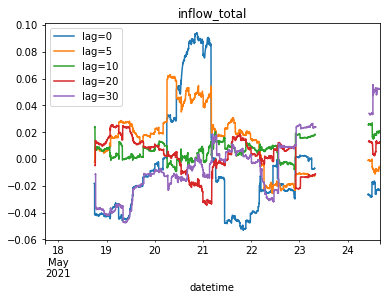

In [191]:
look_back_window = 60*24
f_chg.rolling(look_back_window).corr(btc_ret).plot()
f_chg.shift(5).rolling(look_back_window).corr(btc_ret).plot()
f_chg.shift(10).rolling(look_back_window).corr(btc_ret).plot()
f_chg.shift(20).rolling(look_back_window).corr(btc_ret).plot()
f_chg.shift(30).rolling(look_back_window).corr(btc_ret).plot()
plt.legend(['lag=0','lag=5','lag=10','lag=20','lag=30'])
plt.title(feature)
plt.show()

In [5]:
for feature in feature_list:
    f_chg = exchangeflows_f['inflow_total'].pct_change().ffill(0)
    look_back_window = 60*24
    f_chg.rolling(look_back_window).corr(btc_ret).plot()
    f_chg.shift(5).rolling(look_back_window).corr(btc_ret).plot()
    f_chg.shift(10).rolling(look_back_window).corr(btc_ret).plot()
    f_chg.shift(20).rolling(look_back_window).corr(btc_ret).plot()
    f_chg.shift(30).rolling(look_back_window).corr(btc_ret).plot()
    plt.legend(['lag=0','lag=5','lag=10','lag=20','lag=30'])
    plt.title(feature)
    plt.show()

NameError: name 'feature_list' is not defined

In [2]:
@timeit
def align_feature_df(raw_feature_df, feature_list, ret_df):
    # reverse time index
    feature_df = raw_feature_df[::-1].reset_index()
    
    # get signal_time
    feature_df['signal_time'] = feature_df['datetime'].apply(lambda x: x.ceil('min'))
    
    # select revelant columns
    exchangeflows_f = exchangeflows[feature_list + ['signal_time']].set_index('signal_time')
    
    # drop duplicated index
    feature_df = feature_df[~feature_df.index.duplicated(keep='first')]
    
    # align to ret dataframe
    feature_df = feature_df.reindex(index=ret_df.index).ffill()
    
    return aligned_feature_df

In [3]:
@timeit
def get_feature_df_corr_with_ret(df_features, ret_df, look_back_window = 60*24):
    feature_list = df_features.columns
    df_features_chg = df_features.pct_change().ffill(0)
    for feature in feature_list:
        f_chg = df_features.pct_change().ffill(0)
        f_chg.rolling(look_back_window).corr(btc_ret).plot()
        f_chg.shift(5).rolling(look_back_window).corr(btc_ret).plot()
        f_chg.shift(10).rolling(look_back_window).corr(btc_ret).plot()
        f_chg.shift(20).rolling(look_back_window).corr(btc_ret).plot()
        f_chg.shift(30).rolling(look_back_window).corr(btc_ret).plot()
        plt.legend(['lag=0','lag=5','lag=10','lag=20','lag=30'])
        plt.title(feature)
        plt.show()

In [ ]:
data_dict = pd.read_pickle(os.path.join(LOCAL_DATA_DIR, 'cqerc20.pkl'))